## Work
1. 試改變 monitor "Validation Accuracy" 並比較結果
2. 調整 earlystop 的等待次數至 10, 25 並比較結果

In [1]:
import os
import keras
import matplotlib.pyplot as plt
%matplotlib inline


# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import BatchNormalization

"""
建立神經網路，並加入 BN layer
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
"""Code Here
設定超參數
"""
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 1024
MOMENTUM = 0.95
Patience = ['10', '25']

In [7]:
# 載入 Callbacks
"""Code Here
設定 callbacks: Earlystop
"""
from keras.callbacks import EarlyStopping

results = {}

for p in Patience:
    earlystop = EarlyStopping(monitor="val", 
                          patience=p, 
                          verbose=1
                          )


    """Code Here
    撰寫你的訓練流程並將結果用 dictionary 紀錄
    """

    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True,
          callbacks=[earlystop]
         )

    # Collect results
    exp_tag = "Patience %s" % (str(p))
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    results[exp_tag] = {'train-loss': train_loss,
                        'valid-loss': valid_loss,
                        'train-accuracy': train_acc,
                        'valid-accuracy': valid_acc}
    

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization (BatchNo (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_2 (Batch (None, 128)              

49/49 [==============================] - 6s 121ms/step - loss: 1.0889 - accuracy: 0.6248 - val_loss: 1.4739 - val_accuracy: 0.4833
Epoch 20/50
49/49 [==============================] - 6s 118ms/step - loss: 1.0661 - accuracy: 0.6334 - val_loss: 1.4571 - val_accuracy: 0.4918
Epoch 21/50
49/49 [==============================] - 6s 122ms/step - loss: 1.0442 - accuracy: 0.6423 - val_loss: 1.4806 - val_accuracy: 0.4924
Epoch 22/50
49/49 [==============================] - 6s 119ms/step - loss: 1.0211 - accuracy: 0.6512 - val_loss: 1.4618 - val_accuracy: 0.4938
Epoch 23/50
49/49 [==============================] - 6s 118ms/step - loss: 0.9980 - accuracy: 0.6604 - val_loss: 1.4660 - val_accuracy: 0.4937
Epoch 24/50
49/49 [==============================] - 6s 118ms/step - loss: 0.9788 - accuracy: 0.6662 - val_loss: 1.4643 - val_accuracy: 0.4950
Epoch 25/50
49/49 [==============================] - 6s 118ms/step - loss: 0.9573 - accuracy: 0.6756 - val_loss: 1.4552 - val_accuracy: 0.4987
Epoch 26/50

Epoch 42/50
49/49 [==============================] - 6s 118ms/step - loss: 0.6239 - accuracy: 0.8108 - val_loss: 1.5958 - val_accuracy: 0.4886
Epoch 43/50
49/49 [==============================] - 6s 118ms/step - loss: 0.6070 - accuracy: 0.8166 - val_loss: 1.5928 - val_accuracy: 0.4909
Epoch 44/50
49/49 [==============================] - 6s 117ms/step - loss: 0.5876 - accuracy: 0.8257 - val_loss: 1.6144 - val_accuracy: 0.4899
Epoch 45/50
49/49 [==============================] - 6s 118ms/step - loss: 0.5717 - accuracy: 0.8324 - val_loss: 1.6296 - val_accuracy: 0.4842
Epoch 46/50
49/49 [==============================] - 6s 117ms/step - loss: 0.5538 - accuracy: 0.8389 - val_loss: 1.6380 - val_accuracy: 0.4933
Epoch 47/50
49/49 [==============================] - 6s 118ms/step - loss: 0.5379 - accuracy: 0.8454 - val_loss: 1.6622 - val_accuracy: 0.4875
Epoch 48/50
49/49 [==============================] - 6s 117ms/step - loss: 0.5198 - accuracy: 0.8522 - val_loss: 1.6655 - val_accuracy: 0.4867

49/49 [==============================] - 6s 123ms/step - loss: 1.3063 - accuracy: 0.5449 - val_loss: 1.4870 - val_accuracy: 0.4768
Epoch 11/50
49/49 [==============================] - 6s 121ms/step - loss: 1.2773 - accuracy: 0.5558 - val_loss: 1.4853 - val_accuracy: 0.4747
Epoch 12/50
49/49 [==============================] - 6s 121ms/step - loss: 1.2515 - accuracy: 0.5667 - val_loss: 1.4737 - val_accuracy: 0.4783
Epoch 13/50
49/49 [==============================] - 6s 122ms/step - loss: 1.2252 - accuracy: 0.5751 - val_loss: 1.4775 - val_accuracy: 0.4739
Epoch 14/50
49/49 [==============================] - 6s 125ms/step - loss: 1.2013 - accuracy: 0.5831 - val_loss: 1.4714 - val_accuracy: 0.4786
Epoch 15/50
49/49 [==============================] - 7s 133ms/step - loss: 1.1771 - accuracy: 0.5926 - val_loss: 1.4720 - val_accuracy: 0.4799
Epoch 16/50
49/49 [==============================] - 6s 127ms/step - loss: 1.1535 - accuracy: 0.6012 - val_loss: 1.4528 - val_accuracy: 0.4872
Epoch 17/50

Epoch 33/50
49/49 [==============================] - 6s 118ms/step - loss: 0.8059 - accuracy: 0.7356 - val_loss: 1.5004 - val_accuracy: 0.4980
Epoch 34/50
49/49 [==============================] - 6s 119ms/step - loss: 0.7852 - accuracy: 0.7445 - val_loss: 1.5188 - val_accuracy: 0.4966
Epoch 35/50
49/49 [==============================] - 6s 118ms/step - loss: 0.7648 - accuracy: 0.7527 - val_loss: 1.5184 - val_accuracy: 0.4976
Epoch 36/50
49/49 [==============================] - 6s 118ms/step - loss: 0.7470 - accuracy: 0.7601 - val_loss: 1.5224 - val_accuracy: 0.4952
Epoch 37/50
49/49 [==============================] - 6s 119ms/step - loss: 0.7289 - accuracy: 0.7673 - val_loss: 1.5443 - val_accuracy: 0.4957
Epoch 38/50
49/49 [==============================] - 6s 118ms/step - loss: 0.7087 - accuracy: 0.7767 - val_loss: 1.5354 - val_accuracy: 0.5031
Epoch 39/50
49/49 [==============================] - 6s 119ms/step - loss: 0.6920 - accuracy: 0.7829 - val_loss: 1.5461 - val_accuracy: 0.4994

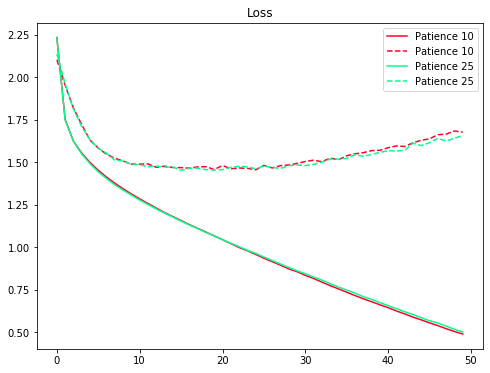

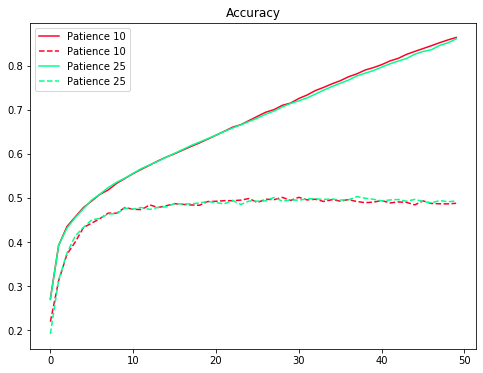

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
NUM_COLORS = len(results.keys())
cm = plt.get_cmap('gist_rainbow')
color_bar = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-accuracy'])),results[cond]['train-accuracy'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-accuracy'])),results[cond]['valid-accuracy'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()